In [43]:
import math
import random

import pandas as pd
import seaborn as sns

%matplotlib inline
random.seed(42)

In [8]:
df = pd.read_csv('./chipotle_stores.csv')
print(df.columns, end='\n\n')
print(df.info())

Index(['state', 'location', 'address', 'latitude', 'longitude'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2629 entries, 0 to 2628
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   state      2629 non-null   object 
 1   location   2629 non-null   object 
 2   address    2629 non-null   object 
 3   latitude   2629 non-null   float64
 4   longitude  2629 non-null   float64
dtypes: float64(2), object(3)
memory usage: 102.8+ KB
None


In [21]:
ny_df = df[df.location.eq('New York')]
ny_df.shape

(52, 5)

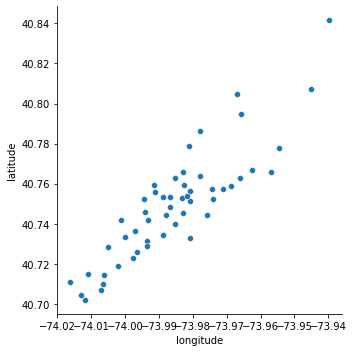

In [24]:
sns.relplot(x='longitude', y='latitude', data=ny_df)

In [32]:
central_latitude = (ny_df['latitude'].min() + ny_df['latitude'].max()) / 2
central_longitude = (ny_df['longitude'].min() + ny_df['longitude'].max()) / 2
earth_radius = 6371 * 10**3

#### Преобразуем колонки latitude и longitude соглачно наших функций

In [42]:

def to_x(long):
    return earth_radius * (long - central_longitude) * math.pi / 180

def to_y(lat):
    return earth_radius * (lat - central_latitude) * math.pi / 180

ny_df_xy = ny_df.transform({'latitude': to_y, 'longitude': to_x})
ny_df_xy = ny_df_xy.rename(columns={'latitude': 'y', 'longitude': 'x'})
ny_df_xy.head()

,y,x
1646,-7754.434623,-3752.379535
1647,-7224.034428,-3215.102768
1648,-1015.588459,1332.147658
1649,-6875.939378,-3162.151237
1650,-569.890201,1733.448436


In [52]:
def smallest_distance(xy_point, df):
    min_d = math.inf
    for i, row in df.iterrows():
        d = math.sqrt((xy_point[0] - row['x'])**2 + (xy_point[1] - row['y'])**2)
        if d < min_d:
            min_d  = d
    return min_d

def random_point():
    random_x = random.uniform(ny_df_xy['x'].min(), ny_df_xy['x'].max())
    random_y = random.uniform(ny_df_xy['y'].min(), ny_df_xy['y'].max())
    return random_x, random_y

#### Ставим серию экспериментов согласно лекции A <= 100, 100 < B < 1000, C >= 1000

In [53]:
# Используем частотный подход

n = 1000
n_a = 0
n_b = 0
n_c = 0

for i in range(n):
    rand_xy = random_point()
    d = smallest_distance(rand_xy, ny_df_xy)
    if d <= 100:
        n_a += 1
    elif d < 1000:
        n_b += 1
    else:
        n_c += 1

#### Вычислим вероятноси событий

In [57]:
p_a = n_a / n
p_b = n_b / n
p_c = n_c / n
p = p_a + p_b + p_c
print(p_a, p_b, p_c, 'total = ', p)

0.019 0.333 0.648 total =  1.0
